In [1]:
# Ejercicios con la distribución normal.

import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Ejercicios con normal univariada.

mu = 22.2
sigma = 4.4

x = stats.norm.cdf(21.4, mu, sigma)
print( "P(T <= 21.4 °F) = " f"{x:.4f}")

x = 0.1818 * sigma + mu
print( "T = z * s + mu = " f"{x:0.1f}°F")

x = stats.norm.cdf(0.1818)
print( "P(z <= 0.1818) = " f"{x:.4f}")

x = ( stats.norm.cdf(25, mu, sigma)
    - stats.norm.cdf(20, mu, sigma) )
print( "P(20 <= T <= 25) = " f"{x:.4f}")
    
x = stats.norm.ppf(0.1, mu, sigma)
print( "q_10 = " f"{x:.1f}°F" )

P(T <= 21.4 °F) = 0.4279
T = z * s + mu = 23.0°F
P(z <= 0.1818) = 0.5721
P(20 <= T <= 25) = 0.4292
q_10 = 16.6°F


In [3]:
# Más ejercicios.

x = stats.norm.sf(1.6)
print( "A: " f"{x:.4f}")

x = ( stats.norm.cdf(1.6)
    - stats.norm.cdf(0.4) )
print( "B: " f"{x:.4f}")

x = ( stats.norm.cdf(0.4)
    - stats.norm.cdf(-0.4) )
print( "C: " f"{x:.4f}")

x = ( stats.norm.cdf(-0.4)
    - stats.norm.cdf(-1.6) )
print( "D: " f"{x:.4f}")

x = stats.norm.cdf(-1.6)
print( "F: " f"{x:.4f}")

A: 0.0548
B: 0.2898
C: 0.3108
D: 0.2898
F: 0.0548


mu_x    = 29.9
mu_y    = 31.8
sigma_x = 7.71
sigma_y = 7.86
rho     = 0.96
cov     = 58.1


<Figure size 432x288 with 0 Axes>

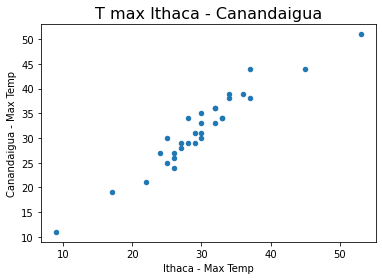

In [4]:
# Normal bivariada.

path = "../datos/"
fname = "A.1_Wilks.csv"

temp = ["Ithaca - Max Temp", "Canandaigua - Max Temp"]

df = pd.read_csv(path + fname, index_col = "Date")

fig = plt.figure()

ax = df.plot.scatter(temp[0], temp[1])
ax.set_title("T max Ithaca - Canandaigua",
    fontsize = 16)

# Se obtienen los parámetros.

mu_x = df[temp[0]].mean()
mu_y = df[temp[1]].mean()
sigma_x = df[temp[0]].std()
sigma_y = df[temp[1]].std()
rho = df[temp].corr()
cov = df[temp].cov()

print("mu_x    = " f"{mu_x:.1f}")
print("mu_y    = " f"{mu_y:.1f}")
print("sigma_x = " f"{sigma_x:.2f}")
print("sigma_y = " f"{sigma_y:.2f}")
print("rho     = " f"{rho.iat[1, 0]:.2f}")
print("cov     = " f"{cov.iat[1, 0]:.1f}")

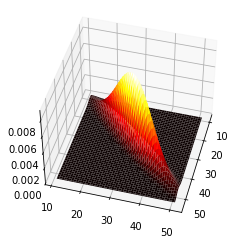

In [5]:
fig = plt.figure()
# Activar eje 3D.
ax = fig.add_subplot(111, projection='3d')

# Rango de las variables y mesh de coordenadas.
x = np.linspace(df[temp[0]].min(), 
    df[temp[0]].max(), 100)
y = np.linspace(df[temp[1]].min(), 
    df[temp[1]].max(), 100)
mesh = np.meshgrid(x, y)
mesh_s = np.stack([mesh[0], mesh[1]], axis = 2)

# Normal multivariada.
z = stats.multivariate_normal.pdf(
    mesh_s, mean = [mu_x, mu_y], cov = cov)

# Gráfica de superficie.
ax.plot_surface(mesh[0], mesh[1], z, cmap = "hot")
# Rotar la gráfica.
ax.view_init(45, 15)

(0.0, 0.18355124440544773)

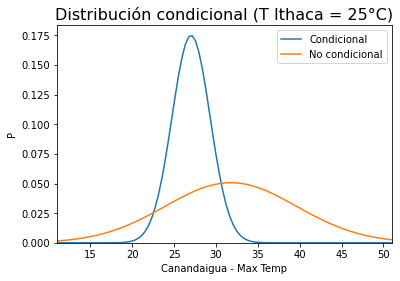

In [34]:
# Distribución condicional.

x = 25

fig, ax = plt.subplots()

# Parámetros condicionales.
mu_y_x = ( mu_y +( rho.iat[1, 0] * sigma_y *
    ( x - mu_x ) )/ sigma_x )
sigma_y_x = sigma_y * np.sqrt(
    1 - rho.iat[1, 0] ** 2)


y = np.linspace(df[temp[1]].min(), 
    df[temp[1]].max(), 100)

z_cond = stats.norm.pdf(y, mu_y_x, sigma_y_x)
z = stats.norm.pdf(y, mu_y, sigma_y)

ax.plot(y, z_cond)
ax.plot(y, z)

ax.set_title("Distribución condicional (T Ithaca = 25°C)",
    fontsize = 16)
ax.legend(["Condicional", "No condicional"])
ax.set_xlabel(temp[1])
ax.set_ylabel("P")
ax.set_xlim(df[temp[1]].min(), 
    df[temp[1]].max())
ax.set_ylim(0)